
# Classification
## k-NN

# Ko'krak saratonini aniqlash

**Tavsif:**
Ko'krak saratoni dunyodagi ayollar orasida eng keng tarqalgan saraton hisoblanadi. Bu barcha saraton holatlarining 25 foizini tashkil qiladi. Ko'krark saratoni ko'krakdagi hujayralar nazoratsiz o'sishidan boshlanadi. Ushbu hujayralar odatda rentgen nurlari orqali ko'rish mumkin bo'lgan o'simtalarni tahlil qilish orqali aniqlanadi.

**Ushbu ma'lumotlar to'plami Kaggle'dan olingan.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
488,913512,B,11.68,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,...,13.32,21.59,86.57,549.8,0.1526,0.1477,0.1490,0.09815,0.2804,0.08024
513,915940,B,14.58,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,...,16.76,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048
279,8911834,B,13.85,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,...,14.98,21.74,98.37,670.0,0.1185,0.1724,0.1456,0.09993,0.2955,0.06912
24,852552,M,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,...,26.46,31.56,177.00,2215.0,0.1805,0.3578,0.4695,0.20950,0.3613,0.09564
495,914333,B,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,...,16.01,28.48,103.90,783.6,0.1216,0.1388,0.1700,0.10170,0.2369,0.06599
167,8712729,M,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,...,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.2318,0.14740,0.2810,0.07228
461,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.26250,0.2641,0.07427
475,911408,B,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,...,14.09,19.35,93.22,605.8,0.1326,0.2610,0.3476,0.09783,0.3006,0.07802
527,91813702,B,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,...,13.61,19.27,87.22,564.9,0.1292,0.2074,0.1791,0.10700,0.3110,0.07592
432,908194,M,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.12590,...,22.03,25.07,146.00,1479.0,0.1665,0.2942,0.5308,0.21730,0.3032,0.08075


In [5]:
df.shape

(569, 32)

- diagnosi ustunida 'benign' qiymatlari xavfsiz 
'melignanat' qiymatlari esa xavfli tashxislariga to'g'ti keladi

In [36]:
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [10]:
df.diagnosis = df.diagnosis.replace("M",1)
df.diagnosis = df.diagnosis.replace("B",0)
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

sklearn yordamida butun son ko'rinishiga o'tkazish

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# labelencode = LabelEncoder()

# df.diagnosis = labelencode.fit_transform(df.diagnosis.values)
# df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [15]:
df.drop(columns="id", axis=1, inplace=True)

In [16]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap="coolwarm")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [17]:
df.corrwith(df.diagnosis)

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

ML qismiga o'tamiz

In [18]:
X = df.drop(columns="diagnosis").values
y = df.diagnosis

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


ML

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
                                                                                                                                                    
# Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = knn.predict(X_test)

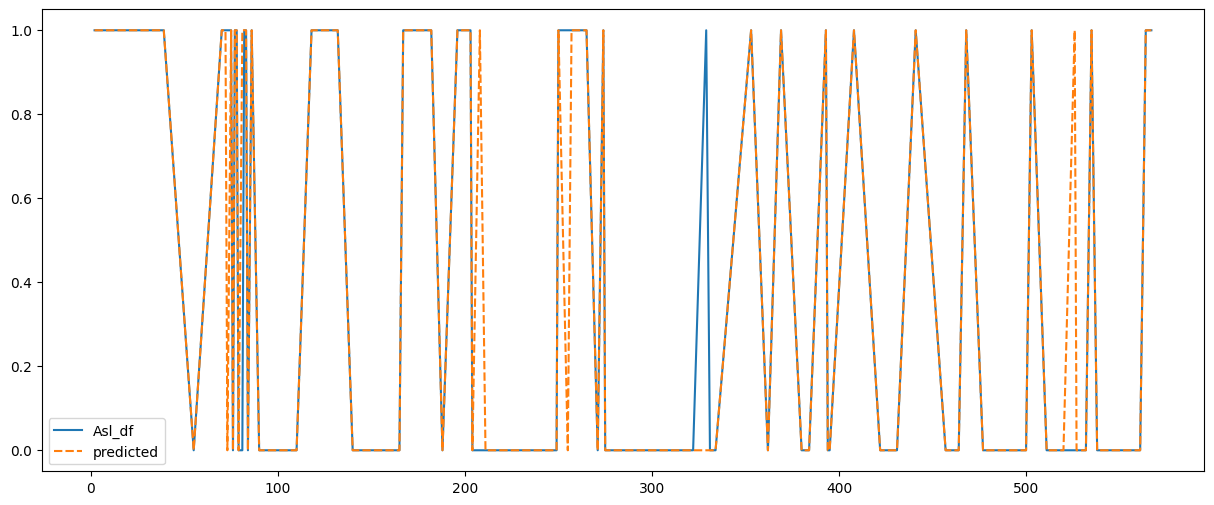

In [35]:
df2 = pd.DataFrame({"Asl_df":y_test,
              "predicted":y_predict})
plt.figure(figsize=(15,6))
sns.lineplot(data=df2)
plt.show()


- Yuqoridagi grafikda ko'rinib turubdiki model deyarli aniq bashorat qilgan faqatgina taxminan 320-330 qiymatlarni noto'g'ri bashorat qilagan

## Baholash

### Jaccard index

In [37]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

np.float64(0.8695652173913043)

### Confusion matrix

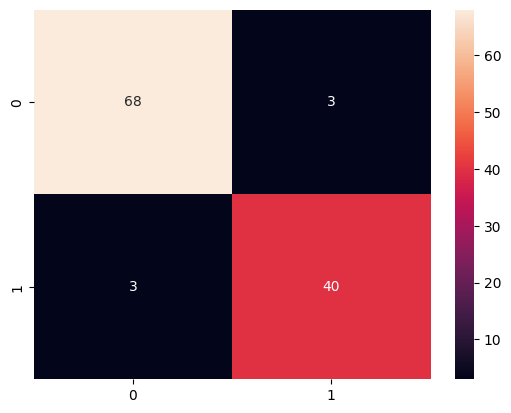

In [40]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()


In [41]:
confusion_matrix(y_test, y_predict)

array([[68,  3],
       [ 3, 40]])

### Precision, recall, F1

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.9302325581395349
recall=0.9302325581395349
f1=0.9302325581395349
accuracy=0.9473684210526315


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Cross-validation yordamida modelni quramiz


In [47]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn, X=X, y=y, cv=5)

# modelni baholash
from sklearn.metrics import classification_report
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



## Eng yaxshi k ni topish

### `for` yordamida

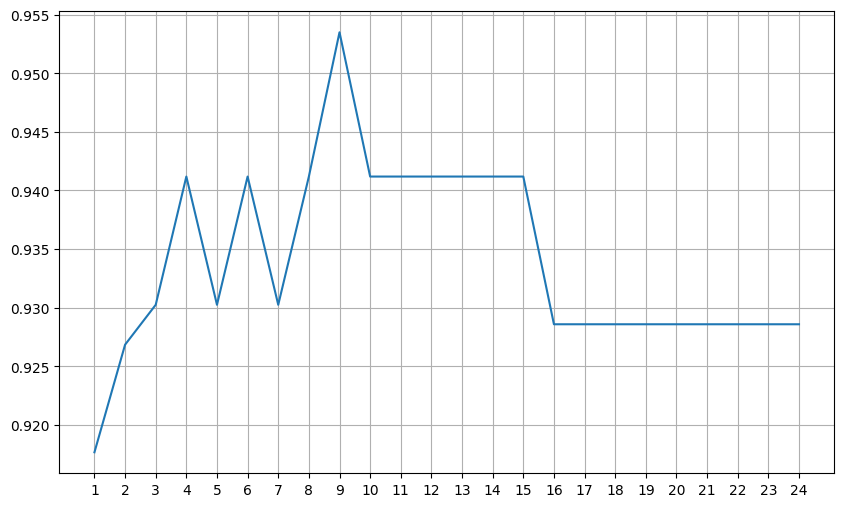

In [53]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test,y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

### Grid Search yordamida kni topish

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors":np.arange(1,25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [63]:
knn_gscv.cv_results_

{'mean_fit_time': array([0.00297647, 0.00353022, 0.0049274 , 0.00362892, 0.00398831,
        0.00377321, 0.00412674, 0.00423322, 0.00502768, 0.00559373,
        0.0061132 , 0.00376711, 0.00381951, 0.00472636, 0.00482283,
        0.00393295, 0.00407233, 0.00348654, 0.00369511, 0.0039012 ,
        0.00348024, 0.00356388, 0.0035543 , 0.00335703]),
 'std_fit_time': array([0.00024208, 0.00030217, 0.00251929, 0.00038876, 0.00019676,
        0.00011542, 0.00019909, 0.00015824, 0.00203477, 0.00328044,
        0.00461134, 0.00035353, 0.00028948, 0.00146881, 0.00178455,
        0.00014556, 0.00120621, 0.00032188, 0.0004239 , 0.00038313,
        0.00033231, 0.00017985, 0.00034181, 0.0002097 ]),
 'mean_score_time': array([0.01538763, 0.02219386, 0.0261517 , 0.00967288, 0.01060286,
        0.01250429, 0.01113081, 0.01281266, 0.0207726 , 0.01686196,
        0.01612644, 0.01390047, 0.0144989 , 0.01296043, 0.01841464,
        0.01887541, 0.02130513, 0.019384  , 0.01209121, 0.0129323 ,
        0.013071

In [64]:
knn_gscv.cv_results_["rank_test_score"]

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16], dtype=int32)

In [65]:
knn_gscv.best_params_

{'n_neighbors': np.int64(9)}

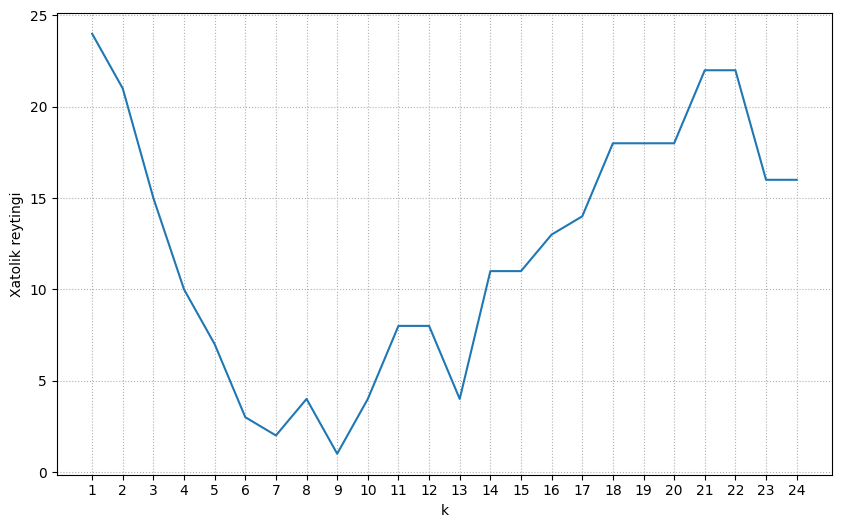

In [70]:
plt.figure(figsize=(10,6))
plt.plot(param_grid["n_neighbors"], knn_gscv.cv_results_["rank_test_score"])
plt.xticks(param_grid["n_neighbors"])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid(linestyle=":")
plt.show()